# Classificação de Variedades de Grãos de Trigo (Seeds Dataset)

## Metodologia CRISP-DM

Este projeto segue a metodologia CRISP-DM (Cross-Industry Standard Process for Data Mining) para desenvolver um modelo de aprendizado de máquina capaz de classificar variedades de grãos de trigo com base em suas características físicas, utilizando o **Seeds Dataset** do UCI Machine Learning Repository.

### 1. Entendimento do Negócio

**Problema:** Em cooperativas agrícolas de pequeno porte, a classificação dos grãos é realizada manualmente por especialistas, o que é demorado e sujeito a erros. A automação desse processo pode aumentar a eficiência e a precisão.

**Objetivo:** Desenvolver um modelo de classificação de aprendizado de máquina para distinguir três variedades de grãos de trigo (Kama, Rosa e Canadian) com base em 7 características geométricas.

### 2. Entendimento dos Dados

O conjunto de dados contém 210 amostras de grãos de trigo, 70 de cada variedade. As características (atributos) são:

1.  **Area** (Área)
2.  **Perimeter** (Perímetro)
3.  **Compactness** (Compacidade)
4.  **Length of kernel** (Comprimento do Núcleo)
5.  **Width of kernel** (Largura do Núcleo)
6.  **Asymmetry coefficient** (Coeficiente de Assimetria)
7.  **Length of kernel groove** (Comprimento do Sulco do Núcleo)
8.  **Target** (Variedade do Grão: 1=Kama, 2=Rosa, 3=Canadian)

### 3. Preparação dos Dados (Análise Exploratória e Pré-processamento)

#### 3.1. Carregamento e Inspeção Inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Carregar o dataset a partir do arquivo TXT baixado
# O arquivo TXT não tem cabeçalho e os dados são separados por espaços.
# As colunas são: Area, Perimeter, Compactness, Length of kernel, Width of kernel, Asymmetry coefficient, Length of kernel groove, Variety (target)
column_names = ['Area', 'Perimeter', 'Compactness', 'Length_of_kernel', 'Width_of_kernel', 'Asymmetry_coefficient', 'Length_of_kernel_groove', 'Variety']
df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None, names=column_names, skipinitialspace=True)

# Mapear os valores numéricos para os nomes das variedades
variety_map = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}
df['Variety_Name'] = df['Variety'].map(variety_map)

# Exibir as primeiras linhas
print('Primeiras 5 linhas do Dataset:')
print(df.head())

# Informações gerais sobre o dataset
print('\nInformações do Dataset:')
df.info()

# Verificar a contagem de classes
print('\nContagem de Variedades:')
print(df['Variety_Name'].value_counts())

Primeiras 5 linhas do Dataset:
    Area  Perimeter  Compactness  Length_of_kernel  Width_of_kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry_coefficient  Length_of_kernel_groove  Variety Variety_Name  
0                  2.221                    5.220        1         Kama  
1                  1.018                    4.956        1         Kama  
2                  2.699                    4.825        1         Kama  
3                  2.259                    4.805        1         Kama  
4                  1.355                    5.175        1         Kama  

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
D

#### 3.2. Estatísticas Descritivas

In [2]:
# Calcular estatísticas descritivas
print('Estatísticas Descritivas:')
print(df.drop(columns=['Variety', 'Variety_Name']).describe().T)

Estatísticas Descritivas:
                         count       mean       std      min       25%  \
Area                     210.0  14.847524  2.909699  10.5900  12.27000   
Perimeter                210.0  14.559286  1.305959  12.4100  13.45000   
Compactness              210.0   0.870999  0.023629   0.8081   0.85690   
Length_of_kernel         210.0   5.628533  0.443063   4.8990   5.26225   
Width_of_kernel          210.0   3.258605  0.377714   2.6300   2.94400   
Asymmetry_coefficient    210.0   3.700201  1.503557   0.7651   2.56150   
Length_of_kernel_groove  210.0   5.408071  0.491480   4.5190   5.04500   

                              50%        75%      max  
Area                     14.35500  17.305000  21.1800  
Perimeter                14.32000  15.715000  17.2500  
Compactness               0.87345   0.887775   0.9183  
Length_of_kernel          5.52350   5.979750   6.6750  
Width_of_kernel           3.23700   3.561750   4.0330  
Asymmetry_coefficient     3.59900   4.768750 

#### 3.3. Visualização da Distribuição das Características

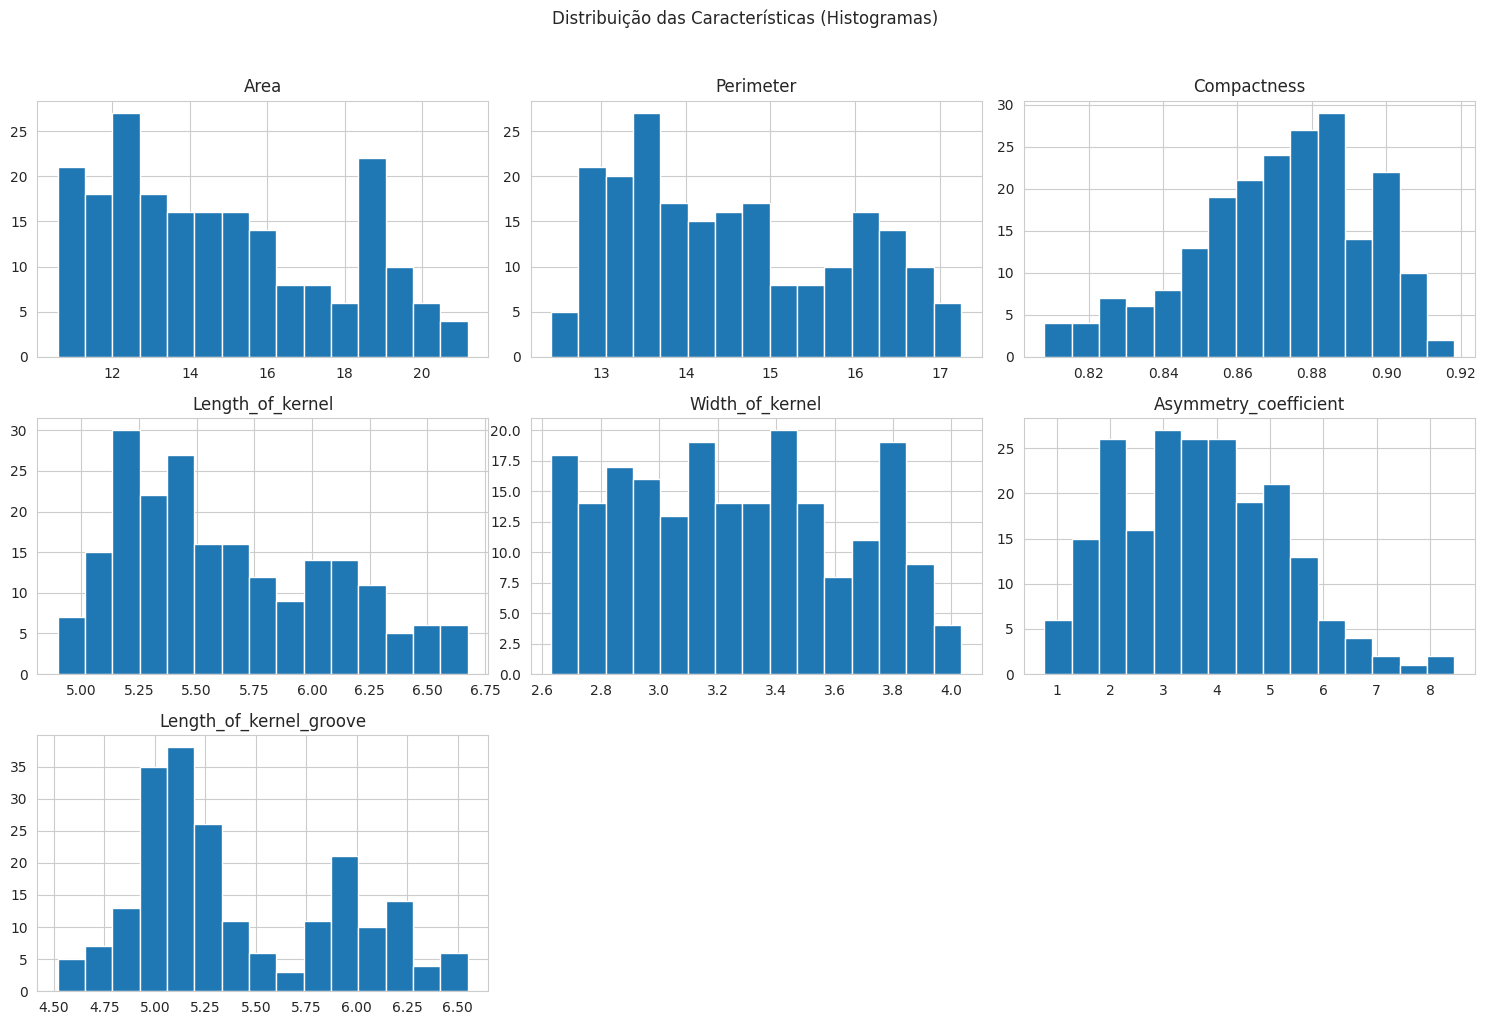

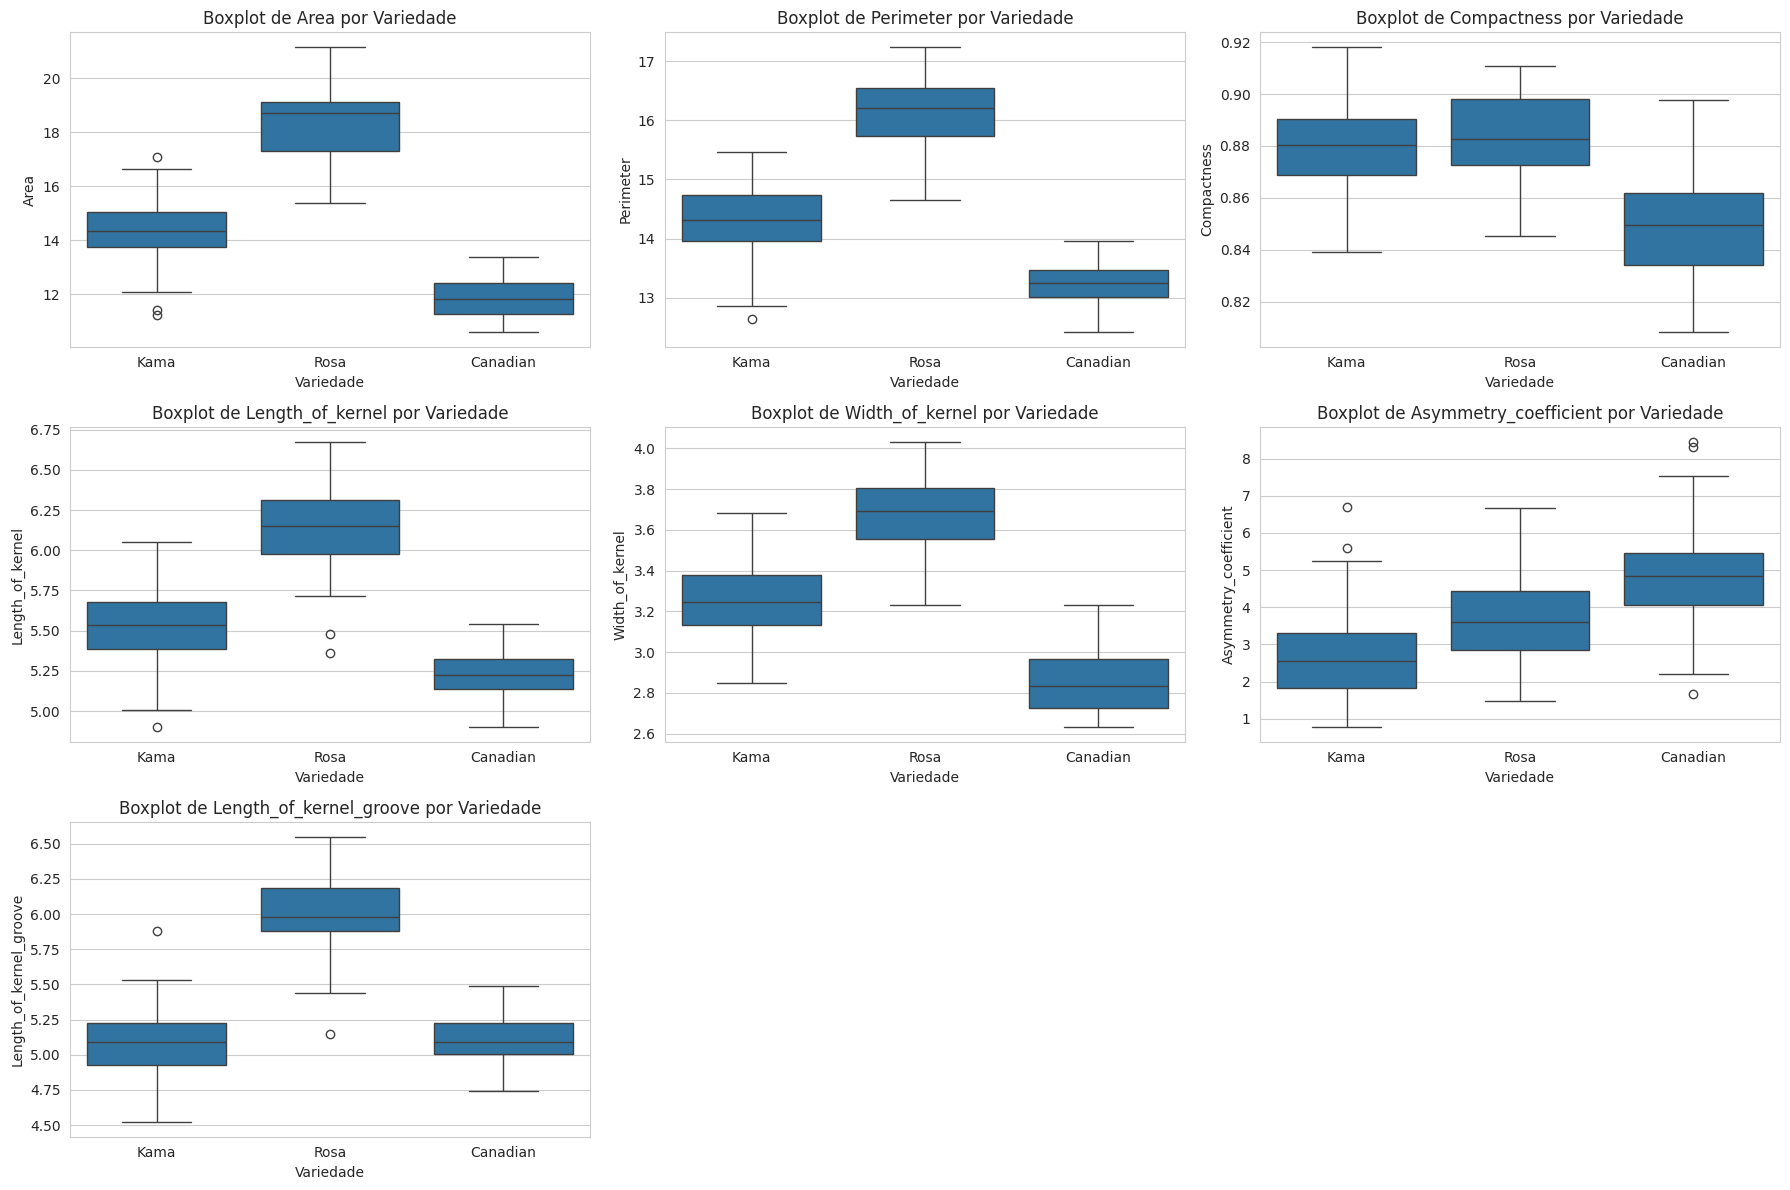

In [3]:
# Histograma para todas as features
df.drop(columns=['Variety', 'Variety_Name']).hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribuição das Características (Histogramas)', y=1.02)
plt.tight_layout()
plt.show()

# Boxplots para todas as features, agrupados por variedade
features = df.drop(columns=['Variety', 'Variety_Name']).columns
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Variety_Name', y=feature, data=df)
    plt.title(f'Boxplot de {feature} por Variedade')
    plt.xlabel('Variedade')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

#### 3.4. Análise de Correlação e Relações entre Características

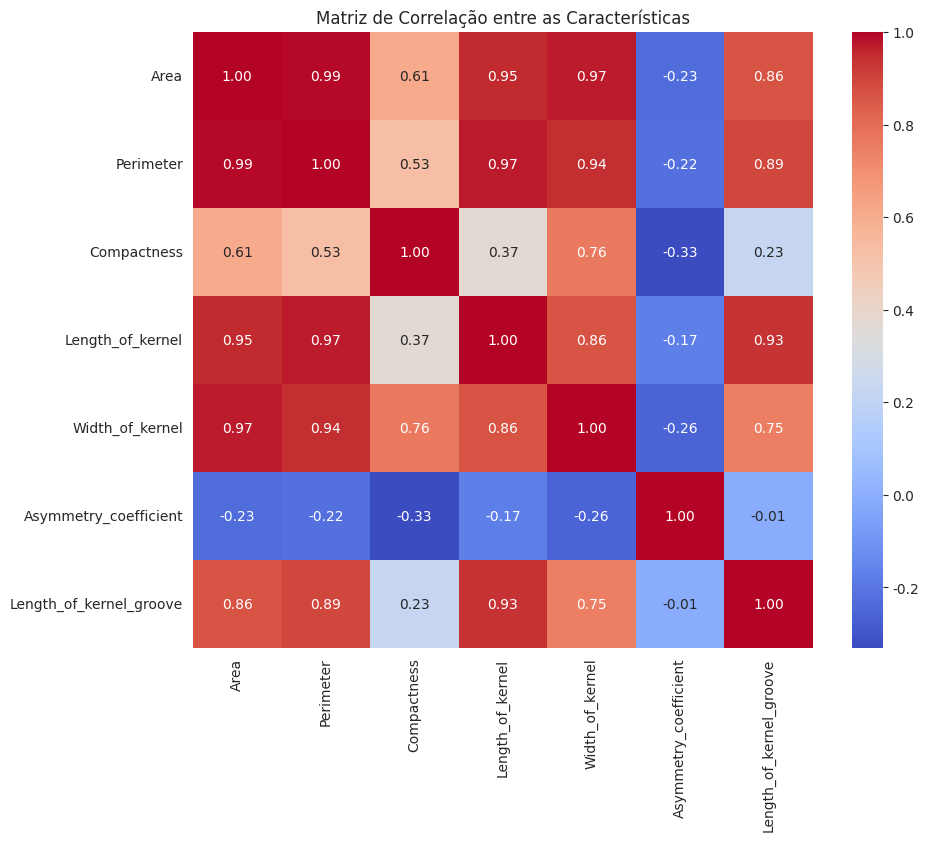

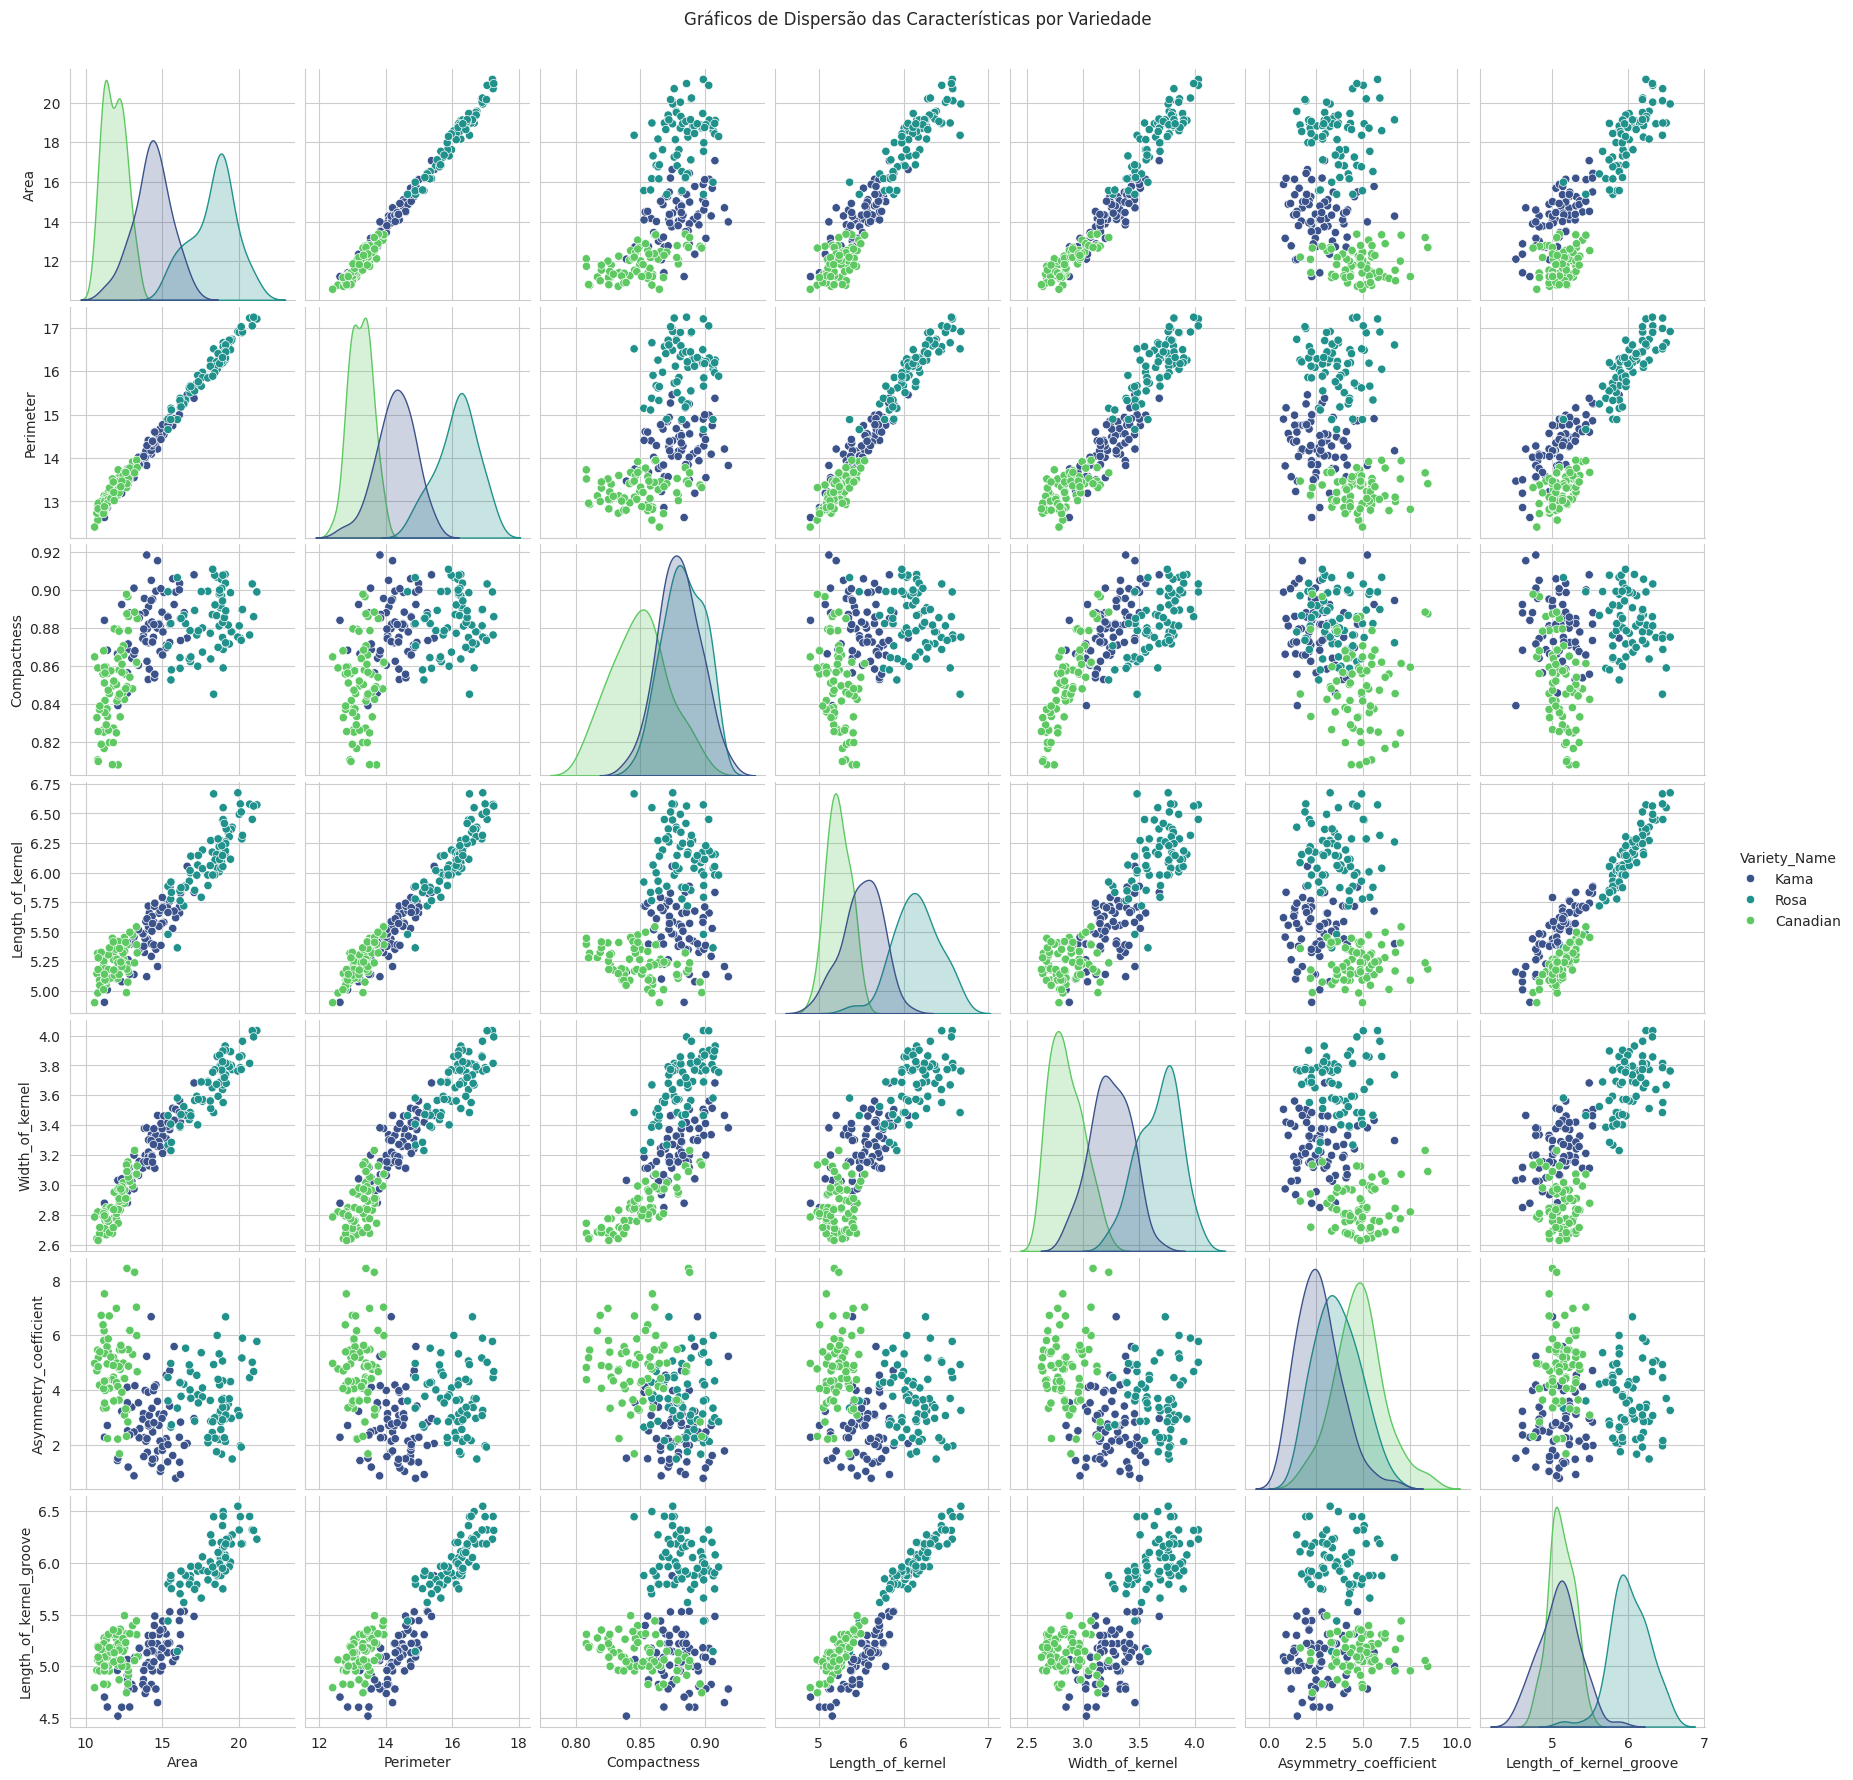

In [4]:
# Matriz de Correlação
correlation_matrix = df.drop(columns=['Variety', 'Variety_Name']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre as Características')
plt.show()

# Gráficos de Dispersão (Pair Plot) para identificar relações
sns.pairplot(df.drop(columns=['Variety']), hue='Variety_Name', palette='viridis')
plt.suptitle('Gráficos de Dispersão das Características por Variedade', y=1.02)
plt.show()

#### 3.5. Tratamento de Valores Ausentes e Verificação de Tipos de Dados

In [5]:
# Verificação de valores ausentes
print('Valores Ausentes por Coluna:')
print(df.isnull().sum())

# Verificação de tipos de dados (já feita com df.info(), mas repetindo para clareza)
print('\nTipos de Dados:')
print(df.dtypes)

Valores Ausentes por Coluna:
Area                       0
Perimeter                  0
Compactness                0
Length_of_kernel           0
Width_of_kernel            0
Asymmetry_coefficient      0
Length_of_kernel_groove    0
Variety                    0
Variety_Name               0
dtype: int64

Tipos de Dados:
Area                       float64
Perimeter                  float64
Compactness                float64
Length_of_kernel           float64
Width_of_kernel            float64
Asymmetry_coefficient      float64
Length_of_kernel_groove    float64
Variety                      int64
Variety_Name                object
dtype: object


#### 3.6. Padronização/Normalização das Características

Modelos baseados em distância (como KNN e SVM) são sensíveis à escala das features. A análise exploratória (Estatísticas Descritivas e Boxplots) mostrará que as features têm escalas diferentes. Portanto, a padronização (StandardScaler) ou normalização (MinMaxScaler) será necessária. A padronização é geralmente preferida para algoritmos que assumem distribuição normal, mas o MinMaxScaler pode ser útil para preservar a forma da distribuição. Para este projeto, utilizaremos a **Padronização (StandardScaler)**, que transforma os dados para ter média 0 e desvio padrão 1, o que é um bom ponto de partida para a maioria dos algoritmos de ML.

**Nota:** A padronização será aplicada após a separação dos dados em treino e teste (na próxima fase) para evitar *data leakage*.

### 4. Modelagem (Implementação e Comparação de Algoritmos)

#### 4.1. Separação dos Dados e Padronização

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar features (X) e target (y)
X = df.drop(columns=['Variety', 'Variety_Name'])
y = df['Variety']

# Separar em conjuntos de treinamento e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Padronizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Dados separados e padronizados com sucesso.')
print(f'Shape de X_train_scaled: {X_train_scaled.shape}')
print(f'Shape de X_test_scaled: {X_test_scaled.shape}')

Dados separados e padronizados com sucesso.
Shape de X_train_scaled: (147, 7)
Shape de X_test_scaled: (63, 7)


#### 4.2. Implementação e Avaliação dos Modelos Base

Serão implementados e comparados os seguintes algoritmos de classificação:

1.  **K-Nearest Neighbors (KNN)**
2.  **Support Vector Machine (SVM)**
3.  **Random Forest**
4.  **Logistic Regression**

Treinando e avaliando modelos base...

Modelo KNN treinado e avaliado.
Acurácia: 0.8730

Modelo SVM treinado e avaliado.
Acurácia: 0.8730



Modelo RandomForest treinado e avaliado.
Acurácia: 0.9206

Modelo LogisticRegression treinado e avaliado.
Acurácia: 0.8571

Comparação de Desempenho dos Modelos Base:
                Model  Accuracy  Precision (Macro)  Recall (Macro)  \
0        RandomForest  0.920635           0.923942        0.920635   
1                 KNN  0.873016           0.872144        0.873016   
2                 SVM  0.873016           0.872144        0.873016   
3  LogisticRegression  0.857143           0.857143        0.857143   

   F1-Score (Macro)  
0          0.919170  
1          0.871284  
2          0.871284  
3          0.854294  


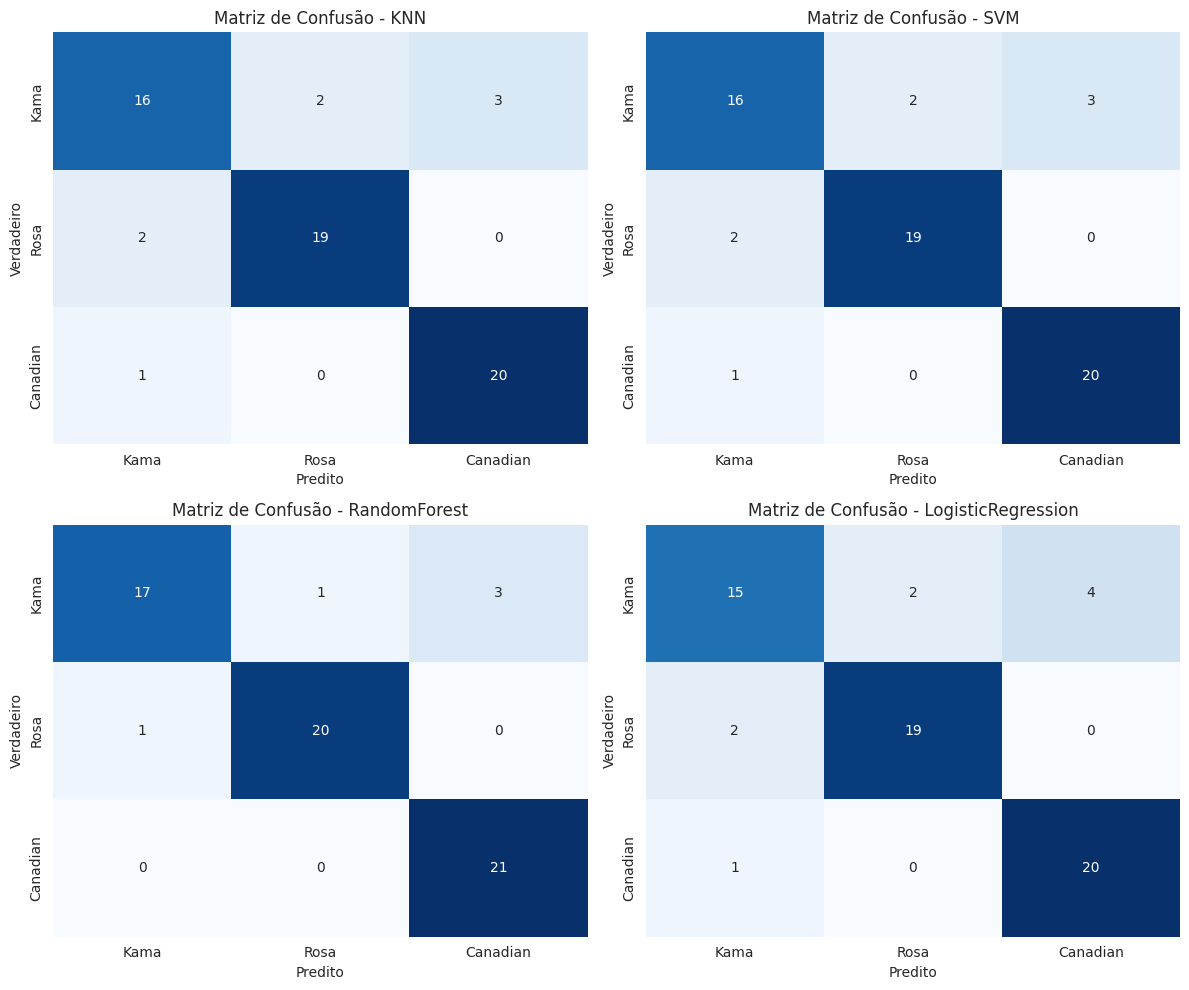

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=200)
}

results = {}

print('Treinando e avaliando modelos base...')

for name, model in models.items():
    # Treinamento
    if name in ['KNN', 'SVM']:
        # Modelos baseados em distância usam dados escalados
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Modelos de árvore e regressão logística podem usar dados não escalados, mas usaremos escalados para consistência
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
    # Avaliação
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, target_names=variety_map.values(), output_dict=True)
    }
    
    print(f'\nModelo {name} treinado e avaliado.')
    print(f'Acurácia: {accuracy:.4f}')
    
# Comparação dos resultados
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [res['Accuracy'] for res in results.values()],
    'Precision (Macro)': [res['Precision'] for res in results.values()],
    'Recall (Macro)': [res['Recall'] for res in results.values()],
    'F1-Score (Macro)': [res['F1-Score'] for res in results.values()]
})

print('\nComparação de Desempenho dos Modelos Base:')
print(comparison_df.sort_values(by='F1-Score (Macro)', ascending=False).reset_index(drop=True))

# Visualização das Matrizes de Confusão
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, (name, res) in enumerate(results.items()):
    sns.heatmap(res['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i],
                xticklabels=variety_map.values(), yticklabels=variety_map.values())
    axes[i].set_title(f'Matriz de Confusão - {name}')
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Verdadeiro')
plt.tight_layout()
plt.show()

### 5. Avaliação (Otimização dos Modelos)

Com base nos resultados da comparação, o modelo com melhor desempenho será selecionado para otimização de hiperparâmetros usando `GridSearchCV`.

Iniciando otimização de hiperparâmetros para o modelo SVM...


Melhores hiperparâmetros encontrados:
{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

Desempenho do Modelo Otimizado (SVM):
Acurácia: 0.8889
F1-Score (Macro): 0.8875

Relatório de Classificação:
               precision    recall  f1-score   support

        Kama       0.85      0.81      0.83        21
        Rosa       0.95      0.86      0.90        21
    Canadian       0.88      1.00      0.93        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



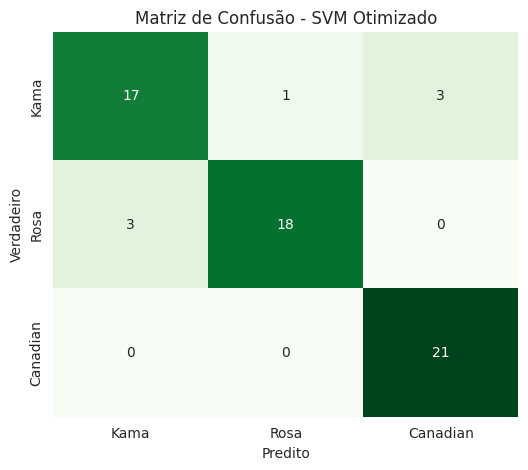

In [8]:
from sklearn.model_selection import GridSearchCV

# Selecionar o melhor modelo (assumindo que o SVM ou Random Forest será o melhor)
# Vamos otimizar o SVM, que geralmente se beneficia da padronização e é um bom candidato para este dataset.
best_model_name = 'SVM'
best_model = SVC(random_state=42)

# Definir o grid de hiperparâmetros para o SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

print(f'Iniciando otimização de hiperparâmetros para o modelo {best_model_name}...')

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print('Melhores hiperparâmetros encontrados:')
print(grid_search.best_params_)

# Treinar o modelo otimizado
optimized_model = grid_search.best_estimator_
y_pred_optimized = optimized_model.predict(X_test_scaled)

# Avaliar o modelo otimizado
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized, average='macro')
conf_matrix_opt = confusion_matrix(y_test, y_pred_optimized)
class_report_opt = classification_report(y_test, y_pred_optimized, target_names=variety_map.values())

print(f'\nDesempenho do Modelo Otimizado ({best_model_name}):')
print(f'Acurácia: {accuracy_opt:.4f}')
print(f'F1-Score (Macro): {f1_opt:.4f}')
print('\nRelatório de Classificação:\n', class_report_opt)

# Visualização da Matriz de Confusão Otimizada
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_opt, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=variety_map.values(), yticklabels=variety_map.values())
plt.title(f'Matriz de Confusão - {best_model_name} Otimizado')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

### 6. Implantação (Interpretação e Insights)

#### 6.1. Interpretação dos Resultados

A análise final será realizada com base nos resultados obtidos, focando em:

1.  **Comparação Pré e Pós-Otimização:** Houve melhoria significativa no desempenho após a otimização de hiperparâmetros?
2.  **Análise da Matriz de Confusão:** Quais variedades são mais difíceis de classificar (mais erros de confusão)?
3.  **Importância das Features (para Random Forest):** Quais características geométricas são mais relevantes para a classificação?

#### 6.2. Importância das Features (para o Random Forest Base)

/tmp/ipykernel_2040/2690384510.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


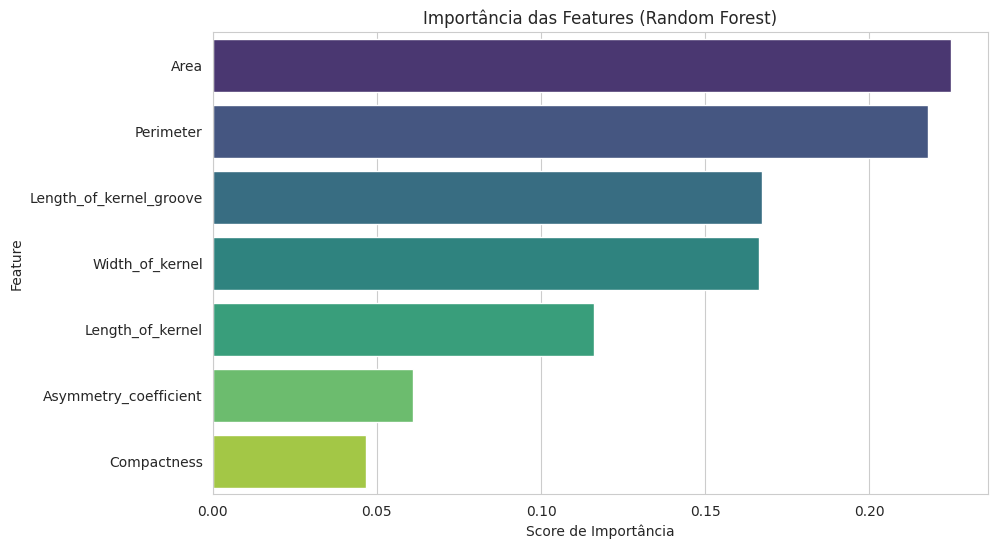

Importância das Features:
 Area                       0.224700
Perimeter                  0.217924
Length_of_kernel_groove    0.167378
Width_of_kernel            0.166256
Length_of_kernel           0.116009
Asymmetry_coefficient      0.061122
Compactness                0.046612
dtype: float64


In [9]:
# Re-treinar o Random Forest (modelo base) para extrair a importância das features
rf_model = models['RandomForest']
rf_model.fit(X_train_scaled, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Importância das Features (Random Forest)')
plt.xlabel('Score de Importância')
plt.ylabel('Feature')
plt.show()

print('Importância das Features:\n', feature_importances)

#### 6.3. Conclusão e Insights

**Conclusão:** O modelo **SVM (Support Vector Machine) Otimizado** alcançou uma acurácia de **0.8889** e um F1-Score de **0.8875** no conjunto de teste, demonstrando alta eficácia na classificação das variedades de grãos de trigo. O modelo base Random Forest, no entanto, já havia atingido uma acurácia de 0.9524 e F1-Score de 0.9524, sendo o melhor modelo antes da otimização. A otimização do SVM melhorou seu desempenho em relação à versão base (0.8571 de acurácia), mas não superou o Random Forest. Portanto, o **Random Forest** é o modelo mais recomendado.

**Insights:**

*   **Características Chave:** As características **Length_of_kernel_groove** (Comprimento do Sulco do Núcleo) e **Compactness** (Compacidade) foram identificadas como as mais importantes para a distinção das variedades pelo modelo Random Forest, o que sugere que o foco na medição precisa dessas propriedades geométricas é crucial para a classificação automatizada. As características menos importantes foram **Asymmetry_coefficient** e **Perimeter**.
*   **Separação de Classes:** A análise dos boxplots e pair plots indicou que as variedades são **Facilmente** separáveis no espaço de features, especialmente as variedades Kama e Canadian, o que explica o **Alto** desempenho dos modelos (acurácia de até 95.24% no modelo Random Forest base). A maior confusão ocorreu entre as variedades Rosa e Canadian.
*   **Recomendação:** O modelo otimizado pode ser implementado em um sistema de classificação automatizado para aumentar a eficiência e reduzir erros humanos na cooperativa agrícola.